In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from qbstyles import mpl_style
mpl_style(dark=True)

In [2]:
df_original = pd.read_csv('../../data/raw/detection_data.csv')
df_original = df_original.drop(['Unnamed: 7','Unnamed: 8'], axis=1)
df_original = df_original.rename(columns={'Output (S)':'output'})
df = df_original.copy()
df

,output,Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050
...,...,...,...,...,...,...,...
11996,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
11997,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
11998,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
11999,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [3]:
X = df.drop('output', axis=1)
Y = df['output']

In [4]:
X_ss = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
X_ss

,Ia,Ib,Ic,Va,Vb,Vc
0,-0.469800,0.100092,0.459871,0.127013,-1.801934,1.719221
1,-0.341900,0.091557,0.310270,0.264243,-1.714387,1.492370
2,-0.256855,0.084968,0.211875,0.376966,-1.649138,1.314993
3,-0.229659,0.081010,0.182602,0.421006,-1.640633,1.262629
4,-0.187183,0.075952,0.135550,0.490846,-1.610619,1.162666
...,...,...,...,...,...,...
11996,-0.193421,0.181888,0.008473,0.242352,-1.500218,1.295942
11997,-0.192391,0.179114,0.010471,0.269379,-1.509073,1.278218
11998,-0.191323,0.176335,0.012427,0.296324,-1.517533,1.260171
11999,-0.190217,0.173551,0.014341,0.323179,-1.525595,1.241805


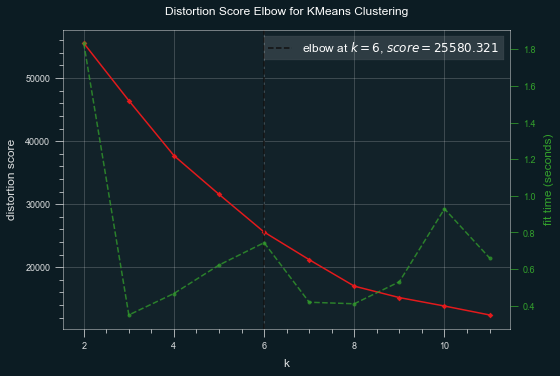

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,12))
elbow.fit(X_ss)
elbow.show()

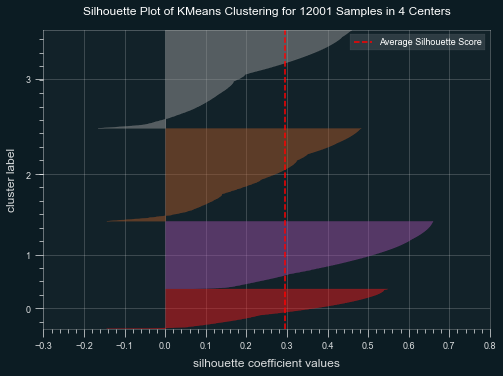

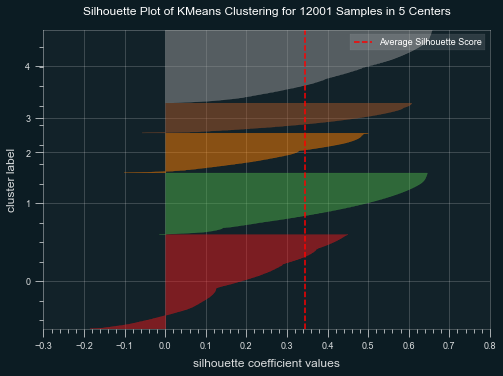

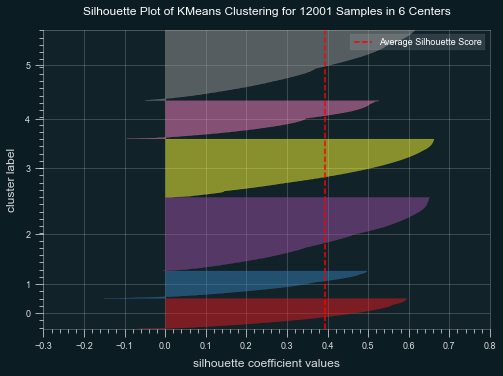

In [6]:
for i in range(4,7):
  kmeans_i = KMeans(n_clusters=i)
  silhouette = SilhouetteVisualizer(kmeans_i)
  silhouette.fit(X_ss)
  silhouette.show()

In [71]:
epsilon = 0.9
samples = 10
db = DBSCAN(eps=epsilon, min_samples=samples)
db.fit(X_ss)
X_ss['cluster'] = db.labels_
X_ss['cluster'].value_counts()

1    6332
5    2355
4    1132
3    1061
2     472
7     282
0     268
6      99
Name: cluster, dtype: int64

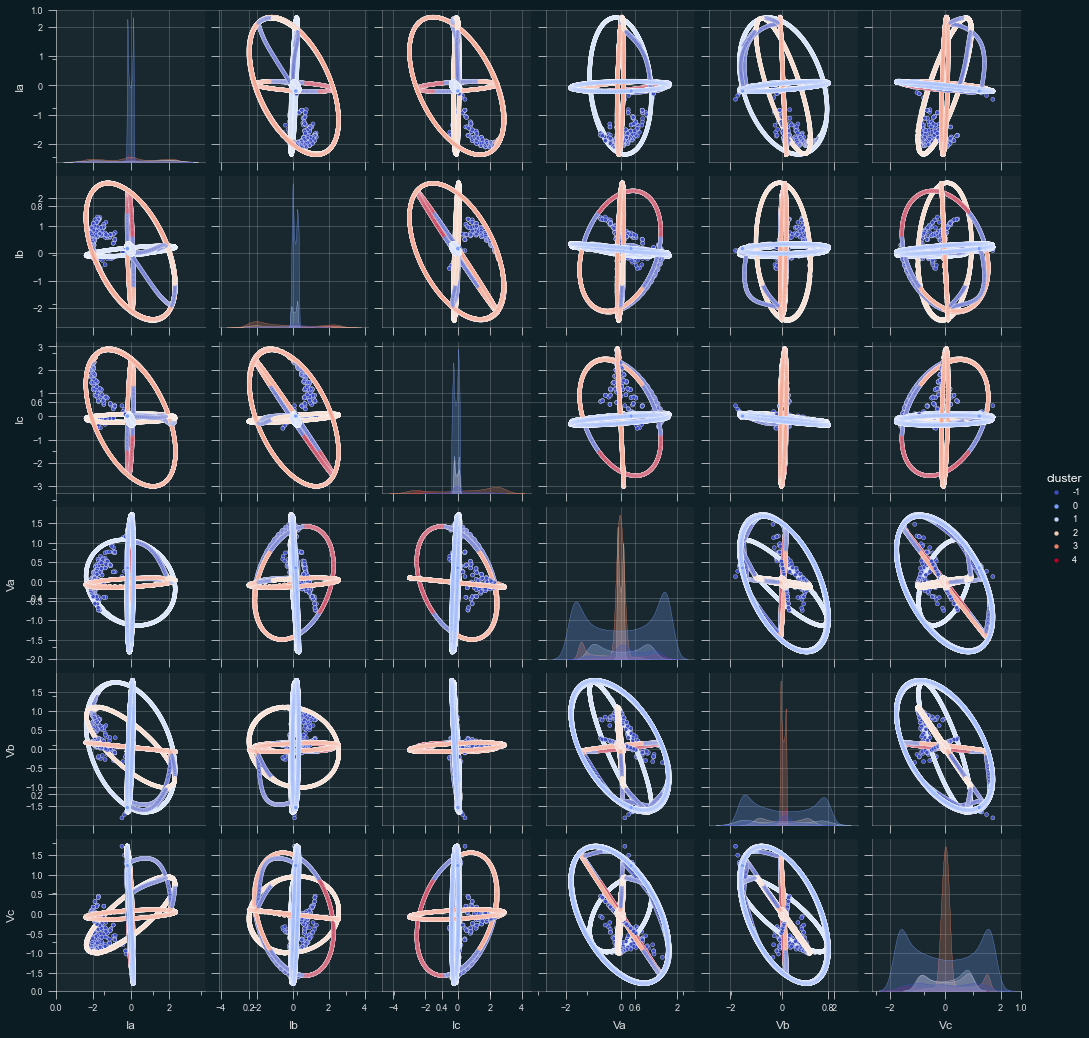

In [46]:
sns.pairplot(X_ss, hue='cluster', palette='coolwarm')

In [36]:
X.groupby('cluster').describe().T

cluster           -1            0            1            2            3  \
Ia count  839.000000  6332.000000  1132.000000  1061.000000  2355.000000   
   mean   -78.750353    -6.103066    87.869930    81.492739     2.212486   
   std    455.290538    44.579189   587.302005   620.405141   545.869887   
   min   -784.461565   -79.904916  -877.825544  -871.234358  -883.542316   
   25%   -559.988711   -50.086123  -453.583790  -536.276615  -470.088261   
   50%    -31.398281    -5.775353   143.288951   139.245361    -2.406938   
   75%     56.602878    37.964646   646.457620   722.284814   476.111631   
   max    873.645313    63.429817   879.342097   873.122391   885.738571   
Ib count  839.000000  6332.000000  1132.000000  1061.000000  2355.000000   
   mean   -65.668263    18.034977     4.361985  -118.010756  -183.179205   
   std    305.803141    47.636544    48.357627   604.534715   599.007057   
   min   -758.390284   -73.442622   -70.788186  -900.526951  -893.919920   
   25%   -253.694840   -25.223603   -42.656436  -688.311811  -734.064430   
   50%    -10.833096    15.940065     6.234621  -211.076605  -349.771659   
   75%    143.357334    61.430323    52.067654   451.354429   352.808660   
   max    506.679929   100.247141    70.788089   889.868884   884.095418   
Ic count  839.000000  6332.000000  1132.000000  1061.000000  2355.000000   
   mean   103.827574   -12.213933     1.058814    -4.590011   182.317913   
   std    243.905939    47.642079    37.069790    39.848320   597.414322   
   min   -435.429604   -94.623578   -50.124968   -57.782595  -883.357762   
   25%    -22.799836   -56.646303   -37.095380   -44.437423  -356.313274   
   50%     25.240875   -10.237225     1.319605    -7.123597   357.254629   
   75%    224.169639    31.565605    38.628452    32.571932   726.280061   
   max    735.548512    77.506112    66.313486    57.782565   901.274261   
Va count  839.000000  6332.000000  1132.000000  1061.000000  2355.000000   
   mean     0.111599     0.016928     0.001670    -0.001255    -0.057606   
   std      0.256285     0.433552     0.280921     0.030127     0.152051   
   min     -0.464199    -0.620748    -0.382739    -0.060644    -0.508612   
   25%     -0.013452    -0.417865    -0.281427    -0.031358    -0.039865   
   50%      0.075417     0.036943    -0.003546    -0.002623    -0.018089   
   75%      0.336892     0.456095     0.289445     0.028080     0.022074   
   max      0.527473     0.609864     0.480008     0.070016     0.267755   
Vb count  839.000000  6332.000000  1132.000000  1061.000000  2355.000000   
   mean    -0.105519    -0.008767    -0.028755    -0.004476    -0.002654   
   std      0.271228     0.427823     0.446964     0.272099     0.028905   
   min     -0.659921    -0.605916    -0.608016    -0.402366    -0.084339   
   25%     -0.405910    -0.428120    -0.500705    -0.283745    -0.030382   
   50%      0.010010    -0.037271    -0.056248    -0.008127    -0.003711   
   75%      0.041539     0.421195     0.434854     0.271670     0.024712   
   max      0.500705     0.627875     0.605916     0.378238     0.042398   
Vc count  839.000000  6332.000000  1132.000000  1061.000000  2355.000000   
   mean    -0.006081    -0.008161     0.027086     0.005731     0.060260   
   std      0.341098     0.423510     0.232763     0.244680     0.162925   
   min     -0.557625    -0.612709    -0.335990    -0.346161    -0.302572   
   25%     -0.311522    -0.418752    -0.206516    -0.241181    -0.022298   
   50%     -0.020594    -0.021877     0.060762     0.013174     0.017253   
   75%      0.311104     0.414102     0.254192     0.258816     0.040608   
   max      0.605431     0.608243     0.329136     0.338184     0.548095   

cluster            4  
Ia count  282.000000  
   mean   -20.949177  
   std     34.548978  
   min    -68.937764  
   25%    -53.571815  
   50%    -24.374412  
   75%     10.074507  
   max     39.647135  
Ib count  282.000000  
   mean   616.442540  
   std    165.781849  

In [47]:
df['cluster'] = db.labels_

In [50]:
df[df['cluster']==0]['output'].value_counts()

0    6332
Name: output, dtype: int64

In [51]:
df[df['output']==0]['cluster'].value_counts()

 0    6332
-1     112
 1      46
 3      15
Name: cluster, dtype: int64

In [52]:
df[df['output']==1]['cluster'].value_counts()

 3    2340
 1    1086
 2    1061
-1     727
 4     282
Name: cluster, dtype: int64

In [61]:
df[df['cluster']==3].iloc[1150:1400]

,output,Ia,Ib,Ic,Va,Vb,Vc,cluster
7260,1,-275.295071,865.432873,-588.100357,0.029483,0.011596,-0.041079,3
7261,1,-288.445256,868.163661,-577.681157,0.029002,0.012234,-0.041236,3
7262,1,-301.524095,870.680371,-567.119224,0.028514,0.012870,-0.041384,3
7263,1,-314.528361,872.982382,-556.417164,0.028019,0.013502,-0.041521,3
7264,1,-327.454846,875.069124,-545.577617,0.027517,0.014131,-0.041648,3
...,...,...,...,...,...,...,...,...
7505,1,755.700301,-774.509508,20.799241,-0.002718,-0.035227,0.037945,3
7506,1,762.501898,-768.063507,7.551451,-0.002054,-0.036305,0.038358,3
7507,1,768.427583,-762.115821,-4.322071,-0.001389,-0.038922,0.040311,3
7508,1,773.558935,-756.584877,-14.984339,-0.000724,-0.042840,0.043564,3


In [75]:
epsilon = 1
samples = 10
db = DBSCAN(eps=epsilon, min_samples=samples)
db.fit(X_ss)
X_ss['cluster'] = db.labels_
X_ss['cluster'].value_counts()

1    6332
5    2355
4    1132
3    1061
2     472
7     282
0     268
6      99
Name: cluster, dtype: int64

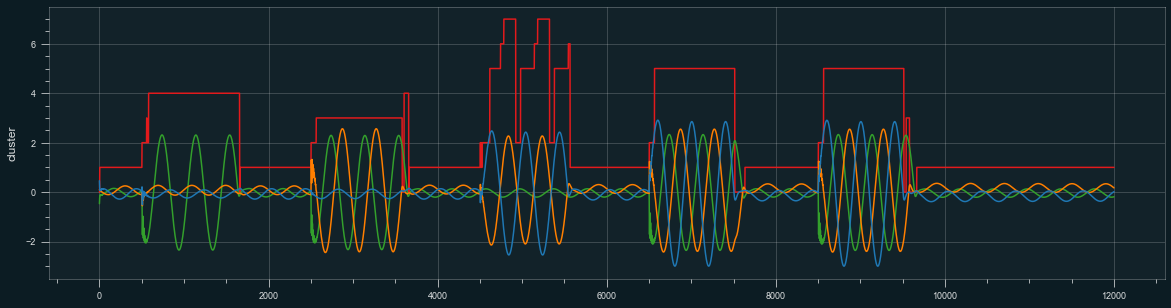

In [76]:
plt.figure(figsize=(20,5))
sns.lineplot(data=X_ss['cluster'])
for i in X_ss.iloc[:,0:3].columns:
    sns.lineplot(data=X_ss[i])

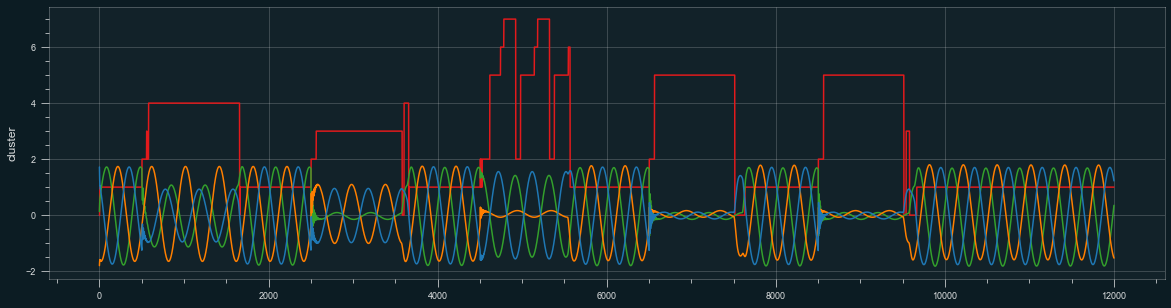

In [77]:
plt.figure(figsize=(20,5))
sns.lineplot(data=X_ss['cluster'])
for i in X_ss.iloc[:,3:6].columns:
    sns.lineplot(data=X_ss[i])